# STAT 345: Nonparametric Statistics

## Lesson 05.1: Measures of Power and Efficiency

**Reading: Conover Section 2.4**

*Prof. John T. Whelan*

Tuesday 18 February 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

- General framework of hypothesis testing: define statistic $T({{\mathbf{x}}})$ from observed data ${{\mathbf{x}}}=\{x_i|i=1,\ldots,n\}$; if $T({{\mathbf{x}}})>c$, we reject null hypothesis $H_0$.  (Also for lower-tailed or two-sided tests if you define the statistic as $-z$ or $\lvert z\rvert$.)

- Significance $\alpha = P(T({{\mathbf{{\color{royalblue}{X}}}}}){\mathbin{>}}c|H_0)$ is prob of type I error (false alarm) if null $H_0$ is true.

- Power $\gamma(\theta) = P(T({{\mathbf{{\color{royalblue}{X}}}}}){\mathbin{>}}c|H_1(\theta))$ is prob of detection (efficiency) if alternative hypothesis $H_1(\theta)$ (possibly w/effect size $\theta$) is true.

Ways to evaluate or compare tests (choice of statistic $T({{\mathbf{x}}})$):<br>
$\quad\ \ \bullet\ $Power curve: hold threshold $c$ \& sample size $n$ fixed (so $\alpha$ fixed) & plot $\gamma(\theta)$ vs $\theta$

  * ROC curve: hold $n$ \& $\theta$ fixed; vary threshold $c$ & plot power $\gamma$ vs significance $\alpha$

  * Asymptotic relative efficiency: hold $c_1$, $c_2$ \& $\theta$ fixed; find ratio of sample sizes $n_2/n_1$ so that $T_1(\mathbf{x})>c_1$ w/sample of size $n_1$ & $T_2(\mathbf{x})>c_2$ w/sample of size $n_2$ have the same $\alpha$ & $\gamma$.

For concreteness, consider two examples:

-   $t$-test, where $H_0$ says sampling dist has mean $\mu=0$ vs 1-sided $H_1$: $\mu>0$. Test statistic is
    $$T_t({{\mathbf{x}}}) = \frac{{{\overline{x}}}}{\sqrt{s^2/n}}$$
    where $n$ is size of the sample ${{\mathbf{x}}}\equiv\{x_i|i=1,\ldots,n\}$,
    ${{\overline{x}}}=\frac{1}{n}\sum_{i=1}^n x_i$ is the sample mean,
    and $s^2=\frac{1}{n-1}\sum_{i=1}^n (x_i-{{\overline{x}}})^2$ is the
    sample variance.

-   One-sample sign test, where $H_0$ says sampling dist median $x_{0.5}=0$ vs $H_1$: $x_{0.5}>0$. Test statistic is the number of positive values
    $$T_s({{\mathbf{x}}}) = \#_i(x_i{\mathbin{>}}0) = \sum_{i=1}^n I_{x{\mathbin{>}}0}(x_i)$$
    where $I_{x{\mathbin{>}}0}(x)$ is the **indicator function** which is $1$ if $x>0$ and $0$ if $x<0$.

For robust inference, both $H_0$ and $H_1$ are composite hypotheses.
- $H_0$ specifies mean or median of sampling distribution, but not its form. Is it normal, or Student-$t$, or Laplace (double exponential)? (For all of these, the mean and median are the same.) Does it violate assumptions of one
of the tests, like the Cauchy distribution (which has a median but whose mean is undefined), or are its mean and
median different, like a gamma distribution?

- The alternative hypotheses ($H_1$) also don't specify distribution, but also don’t specify value of the non-zero location parameter $\theta$.  We call this the size of the effect, a
measure of the amount by which $H_1$ differs from $H_0$. Assume
for simplicity that $\theta=0$ corresponds to null hypothesis $H_0$ and
that $H_1$ specifies $\theta>0$.

- Also see that the definitions of $T({{\mathbf{x}}})$ above depend on the size $n$ of the data sample (a property of $\mathbf{x}$ which we know before we’ve collected the data).  Threshold $c$ of interest will be set in a way that depends on $n$.

So, taking all this into account, the significance $\alpha$ of a test
depends on:

-   The choice of test statistic $T({{\mathbf{x}}})$

-   The form of null sampling distribution

-   The choice of threshold $c$

-   The sample size $n$

The power $\gamma$ depends on all of that plus the effect size $\theta$.

Now we can consider a comparison between two families of tests with
statistics $T_1({{\mathbf{x}}})$ and $T_2({{\mathbf{x}}})$. The
comparison is to be done under the assumption of a null sampling
distribution, so there will be one comparison assuming a normal sampling
distribution, one for Laplace, one for Student-$t$, etc. We can write the
significance and power of each test as
$$\begin{gathered}
    \alpha_1 = \alpha_1(c_1,n_1)
    \qquad\hbox{and}\qquad
    \gamma_1 = \gamma_1(c_1,n_1,\theta)
    \\
    \alpha_2 = \alpha_2(c_2,n_2)
    \qquad\hbox{and}\qquad
    \gamma_2 = \gamma_2(c_2,n_2,\theta)
  \end{gathered}$$

In general, if $\alpha_1=\alpha_2$, $n_1=n_2$ and $\gamma_1>\gamma_2$,
we say that $T_1$ gives us a more powerful (or efficient) test than
$T_2$. But this may depend on the form of the sampling distribution and
the significance $\alpha$ and sample size $n$ at which the comparison is
done.

Note that it doesn’t really make sense to compare the thresholds $c_1$
and $c_2$, since they’re defined for different statistics.

## Power Curves

One comparison: fix a value of
$n=n_1=n_2$; choose $c_1$ and $c_2$ to get $\alpha=\alpha_1=\alpha_2$ and then plot $\gamma_1(\theta)$ and
$\gamma_2(\theta)$ as functions of the effect size $\theta$.

E.g., find the exact $\alpha$ for a sign test:

In [3]:
n=80; nulldist = stats.binom(n,0.5); ycrit = nulldist.isf(0.05); realalpha = nulldist.sf(ycrit)
print('The significance of a sign test with n=%d which rejects if n+ > %d is %f' % (n,ycrit,realalpha))

The significance of a sign test with n=80 which rejects if n+ > 47 is 0.046456


To get the power, we have to know the actual sampling distribution under $H_1$; if it's $N(\theta,1)$, $p_\theta=P(\color{royalblue}{X}>0|\theta)=1-\Phi(-\theta)$, and $\gamma_s(\theta)=P(\color{royalblue}{N_+}\mathbin{>}47)$ comes from tail of $\operatorname{Bin}(n,p_\theta)$.

In [6]:
theta_t = np.linspace(0,0.6,101); sampledist_t = stats.norm(loc=theta_t); ptheta_t = sampledist_t.sf(0.)
altdist_t = stats.binom(n,ptheta_t); gammas_t = altdist_t.sf(ycrit)

On the other hand, if we use the central limit theorem (to avoid Monte Carlo), $E(\color{royalblue}{X})=\theta$ & $\operatorname{Var}(\color{royalblue}{X})=1$ mean the power curve for the $t$-test is
$$
\gamma_t(\theta)=1-\Phi\left(z_{1-\alpha}-\theta\sqrt{n}\right)
$$

In [7]:
realzcrit = stats.norm.isf(realalpha); realzcrit

1.6802335596291385

In [8]:
gammat_t = stats.norm(loc=(theta_t*np.sqrt(n))).sf(realzcrit)

To compare the two tests, we plot $\gamma_s(\theta)$ & $\gamma_t(\theta)$ vs $\theta$:

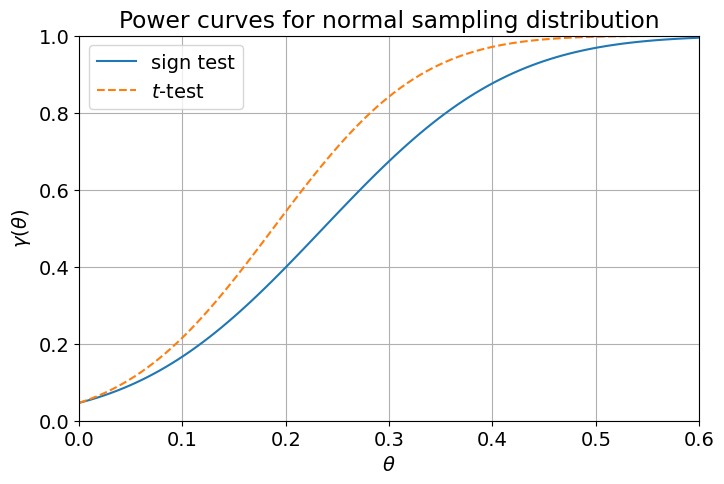

In [9]:
plt.plot(theta_t,gammas_t,ls='-',label='sign test'); plt.plot(theta_t,gammat_t,ls='--',label=r'$t$-test');
plt.legend(); plt.xlabel(r'$\theta$'); plt.ylabel(r'$\gamma(\theta)$');
plt.grid(); plt.xlim(0,0.6); plt.ylim(0,1); plt.title('Power curves for normal sampling distribution');

If the sampling distribution is Laplace, but still with $E(\color{royalblue}{X})=\theta$ & $\operatorname{Var}(\color{royalblue}{X})=1$, the central limit theorem says $\gamma_t(\theta)=1-\Phi\left(z_{1-\alpha}-\theta\sqrt{n}\right)$ as before.


In [10]:
stats.laplace(scale=np.sqrt(0.5)).std()

1.0

But for the power of the sign test, we need $p_\theta=P(\color{royalblue}{X}>0|\theta)$ when $\color{royalblue}{X}$ is Laplace.

In [11]:
lapdist_t = stats.laplace(loc=theta_t,scale=np.sqrt(0.5)); pthetalap_t = lapdist_t.sf(0.)
altdistlap_t = stats.binom(n,pthetalap_t); gammaslap_t = altdistlap_t.sf(ycrit)

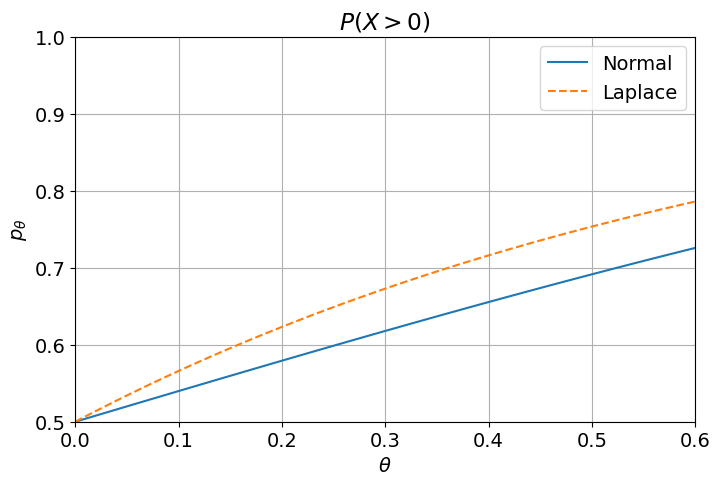

In [12]:
plt.plot(theta_t,ptheta_t,ls='-',label='Normal'); plt.plot(theta_t,pthetalap_t,ls='--',label=r'Laplace');
plt.legend(); plt.xlabel(r'$\theta$'); plt.ylabel(r'$p_\theta$');
plt.grid(); plt.xlim(0,0.6); plt.ylim(0.5,1); plt.title(r'$P(X>0)$');

Sanity check: for positive location parameter & same variance, more of Laplace distribution's area at positive $x$.

Now we compare the power curves w/same $n$ & $\alpha$ as before, but now Laplace sampling distribution.

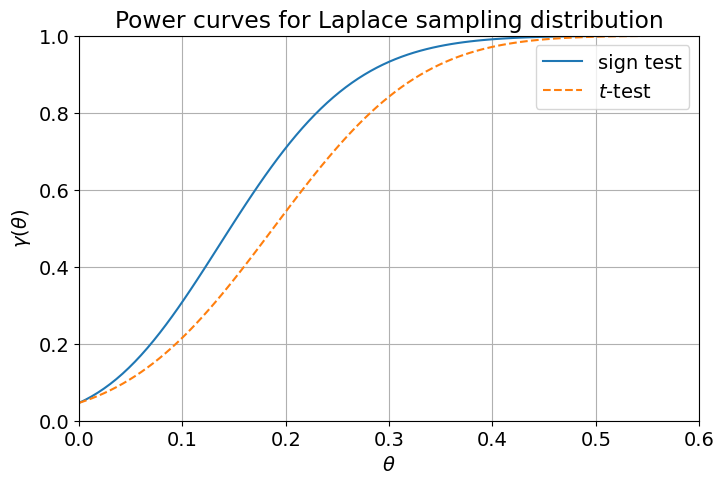

In [13]:
plt.plot(theta_t,gammaslap_t,ls='-',label='sign test'); plt.plot(theta_t,gammat_t,ls='--',label=r'$t$-test');
plt.legend(); plt.xlabel(r'$\theta$'); plt.ylabel(r'$\gamma(\theta)$');
plt.grid(); plt.xlim(0,0.6); plt.ylim(0,1); plt.title('Power curves for Laplace sampling distribution');

## ROC Curves

- To compare power curves, need to set $\alpha_1=\alpha_2=\alpha$, which fixes thresholds $c_1$ & $c_2$,

- Instead consider families of tests which can be "tuned" changing threshold.  Lowering $c$ increases power $\gamma$ but increases false alarm prob $\alpha$.

- Fix $n$ & $\theta$ and consider how $\alpha(c)$ & $\gamma(c)$ change with $c$.

- To compare tests, can't talk about "the same threshold" so don't plot $\gamma_1(c_1)$ and $\gamma_2(c_2)$ vs "$c$".  Instead consider $\gamma_1(c_1)$ and $\alpha_1(c_1)$ as functions which defining a parametrized curve in the $\alpha$-$\gamma$ plane.

- $\gamma$ vs $\alpha$ is called an ROC (“Receiver Operating Characteristic”) curve, developed for radar during WWII.  More often seen in signal processing than classical stats, but a useful complement to other measures.

First, let's construct the ROC for the sign test.  If the sample size is $n$, we can think of the sign test as a family of $n+2$ tests, which reject the null hypothesis if $t^{+}> c$ for $c\in\{-1,0,1,\ldots,n\}$.  (If $c=-1$, the test always rejects $H_0$, and $\alpha=\gamma=1$, while if $c=n$, the test never rejects $H_0$, and $\alpha=\gamma=0$.)

In [14]:
n = 100; theta = 0.2; cs_c = np.arange(-1,n+1); cs_c

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

For each value of $c$, we can calculate the probability of rejecting $H_0$ if the sample is drawn from the null dustribution, which is $\alpha_s(c)$:

In [15]:
p0 = 0.5; alphas_c = stats.binom(n,p0).sf(cs_c); alphas_c

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99999999e-01, 9.99999998e-01, 9.99999992e-01,
       9.99999972e-01, 9.99999909e-01, 9.99999718e-01, 9.99999166e-01,
       9.99997654e-01, 9.99993710e-01, 9.99983920e-01, 9.99960749e-01,
       9.99908428e-01, 9.99795611e-01, 9.99563140e-01, 9.99105035e-01,
       9.98241179e-01, 9.96681440e-01, 9.93983512e-01, 9.89510632e-01,
       9.82399900e-01, 9.71556033e-01, 9.55686960e-01, 9.33394690e-01,
       9.03326048e-01, 8.64373488e-01, 8.15899191e-01, 7.57940793e-01,
       6.91350293e-01, 6.17823283e-01, 5.39794619e-01, 4.60205381e-01,
       3.82176717e-01, 3.08649707e-01, 2.42059207e-01, 1.84100809e-01,
      

And likewise the probability of rejecting $H_0$ if the sample is drawn from $N(\theta,1)$ for the chosen value $\theta=0.2$ of the effect size, which is $\gamma(c)$ or more completely $\gamma_s(c;\theta)$:

In [16]:
p1 = stats.norm(loc=theta).sf(0); p1

0.579259709439103

In [17]:
gammas_c = stats.binom(n,p1).sf(cs_c); gammas_c

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99999999e-01, 9.99999995e-01, 9.99999984e-01,
       9.99999951e-01, 9.99999851e-01, 9.99999567e-01, 9.99998797e-01,
       9.99996797e-01, 9.99991827e-01, 9.99979990e-01, 9.99952972e-01,
       9.99893839e-01, 9.99769684e-01, 9.99519541e-01, 9.99035757e-01,
       9.98137356e-01, 9.96535028e-01, 9.93789751e-01, 9.89270668e-01,
       9.82122324e-01, 9.71255585e-01, 9.55378683e-01, 9.33082776e-01,
       9.02988480e-01, 8.63946113e-01, 8.15264974e-01, 7.56930666e-01,
      

We make the ROC as a parametric plot of $\gamma(c)$ vs $\alpha(c)$:

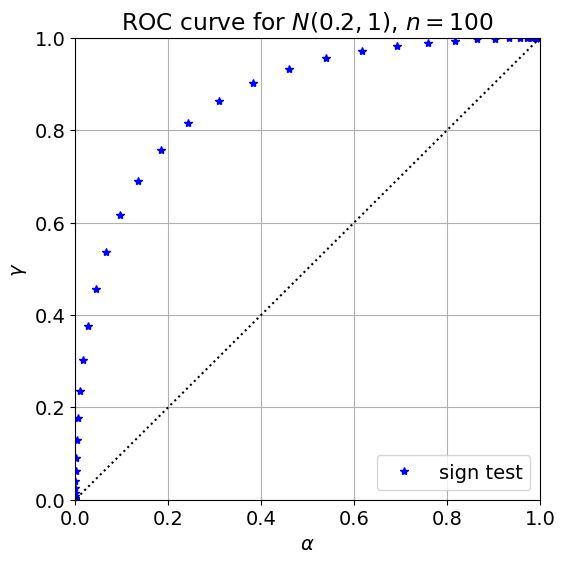

In [18]:
plt.figure(figsize=(6,6)); plt.plot(alphas_c,gammas_c,'b*',label='sign test');plt.plot(alphas_c,alphas_c,'k:');
plt.xlabel(r'$\alpha$');plt.ylabel(r'$\gamma$');plt.title(r'ROC curve for $N(%.1f,1)$, $n=%d$' % (theta,n));
plt.grid();plt.legend(loc='lower right');plt.xlim(0,1);plt.ylim(0,1);

What if we want to find out the threshold which gives $\alpha\approx 0.2$, $\gamma\approx 0.8$?

In [19]:
flag02_c = (0.15 < alphas_c) & (alphas_c < 0.2); cs_c[flag02_c]

array([54])

In [20]:
alphas_c[flag02_c], gammas_c[flag02_c]

(array([0.18410081]), array([0.75693067]))

In [21]:
gammas_c[flag02_c] - alphas_c[flag02_c], max(gammas_c-alphas_c)

(array([0.57282986]), 0.5732057670509589)

Not necessarily useful to maximize $\gamma-\alpha$ since often $\alpha$ is proscribed.

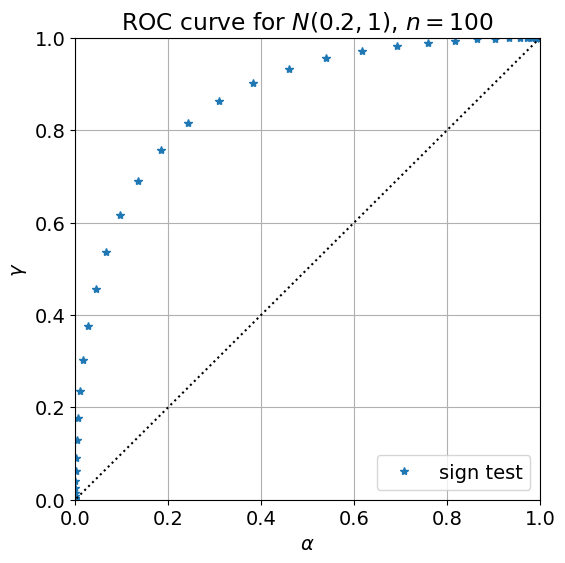

In [22]:
plt.figure(figsize=(6,6)); plt.plot(alphas_c,gammas_c,'*',label='sign test');plt.plot(alphas_c,alphas_c,'k:');
plt.xlabel(r'$\alpha$');plt.ylabel(r'$\gamma$');plt.title(r'ROC curve for $N(%.1f,1)$, $n=%d$' % (theta,n));
plt.grid();plt.legend(loc='lower right');plt.xlim(0,1);plt.ylim(0,1);

Convenient to draw line $\gamma=\alpha$, since the ROC curve for any
unbiased ($\gamma\ge\alpha$) test must lie above and to the left of that line. Also
note a more powerful test will be above & to left of a
less powerful one.

For comparison, draw ROC curve for $t$-test w/$n=100$, $H_1$: $\color{royalblue}{X}\sim N(0.2,1)$.  Could use CLT again, but this time use Monte Carlo to be ready for situations w/o theoretical power curve.  Construct $N=10,\!000$ samples of size $n=100$, $\{x^{(I)}_i\}$, from the null distribution, and construct the test statistic
$$
t^{(I)}_0=\frac{\overline{x}^{(I)}}{s^{(I)}\left/\sqrt{n}\right.}
$$
in the usual way:

In [23]:
N = 10**4; np.random.seed(20250218); x_Ii = stats.norm.rvs(size=(N,n))
xbar_I = np.mean(x_Ii,axis=-1); s_I = np.std(x_Ii,ddof=1,axis=-1)
t0_I = xbar_I / (s_I/np.sqrt(n)); t1_I = (xbar_I+theta) / (s_I/np.sqrt(n))

Also use the usual trick of re-using the Monte Carlo samples and constructing the $t$-statistic you'd expect from $N(\theta,1)$ as
$$
t^{(I)}_1=\frac{\overline{x}^{(I)}+\theta}{s^{(I)}\left/\sqrt{n}\right.}
$$

In principle the $t$-test is a family of infinitely many tests which reject $H_0$ if $t\ge c$ where $c$ can be any real number.  For the purpose of plotting the curve, we'll choose 1000 evenly-spaced points in $c\in[-3,3+\theta\sqrt{n}]$:

In [24]:
cmin = -3; cmax = 3 + theta * np.sqrt(n); ct_c = np.linspace(cmin,cmax,1000)

Our estimate of $\alpha(c)$ is then the fraction of Monte Carlo samples in which $t^{(I)}_0\ge c$, while $\gamma(c)$ is the fraction in which $t^{(I)}_1\ge c$:

In [25]:
alphat_c = np.mean(t0_I[None,:] >= ct_c[:,None], axis=-1)
gammat_c = np.mean(t1_I[None,:] >= ct_c[:,None], axis=-1)

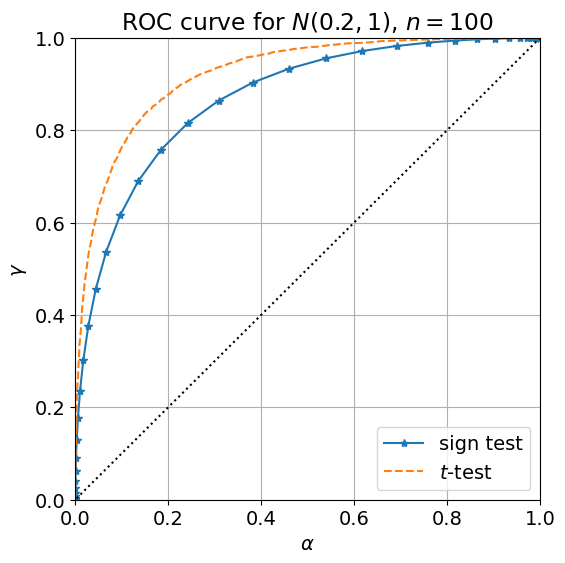

In [26]:
plt.figure(figsize=(6,6)); plt.plot(alphas_c,gammas_c,'-*',label='sign test');
plt.plot(alphas_c,alphas_c,'k:');plt.plot(alphat_c,gammat_c,'--',label=r'$t$-test');
plt.xlabel(r'$\alpha$');plt.ylabel(r'$\gamma$');plt.title(r'ROC curve for $N(%.1f,1)$, $n=%d$' % (theta,n));
plt.grid();plt.legend(loc='lower right');plt.xlim(0,1);plt.ylim(0,1);

For a normal sampling distribution the $t$-test has a
higher power $\gamma$ at any given significance $\alpha$.

If we re-do
the construction for the Laplace distribution, the situation is reversed.

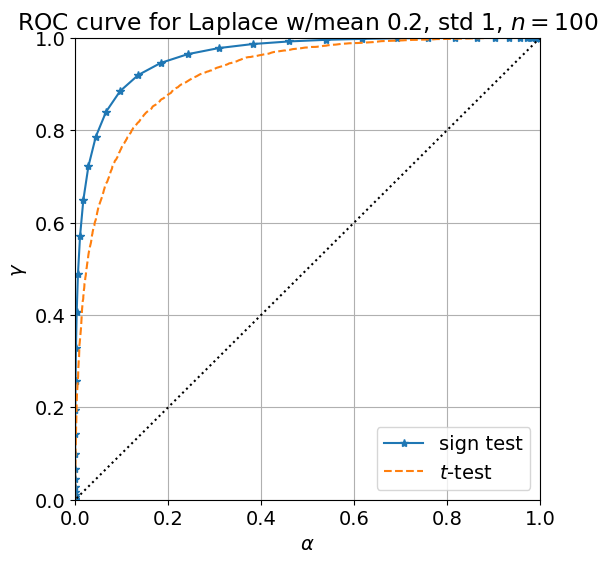

In [27]:
p1=stats.laplace(loc=theta,scale=np.sqrt(0.5)).sf(0);alphas_c=stats.binom(n,p0).sf(cs_c);gammas_c=stats.binom(n,p1).sf(cs_c);
np.random.seed(20230220); x_Ii = stats.laplace(scale=np.sqrt(0.5)).rvs(size=(N,n));xbar_I = np.mean(x_Ii,axis=-1);
s_I = np.std(x_Ii,ddof=1,axis=-1);t0_I=xbar_I/(s_I/np.sqrt(n));t1_I=(xbar_I+theta)/(s_I/np.sqrt(n))
plt.figure(figsize=(6,6));plt.plot(alphas_c,gammas_c,'-*',label='sign test');plt.plot(alphas_c,alphas_c,'k:'); 
plt.plot(alphat_c,gammat_c,'--',label=r'$t$-test');plt.xlabel(r'$\alpha$'); plt.ylabel(r'$\gamma$');
plt.legend(loc='lower right');plt.xlim(0,1);plt.ylim(0,1);plt.grid(True);plt.title(r'ROC curve for Laplace w/mean %.1f, std 1, $n=%d$'% (theta,n));

Since hypothesis tests get more interesting the lower the false alarm
probability $\alpha$, it’s sometimes helpful to do the ROC plot with
$\alpha$ on a log scale:

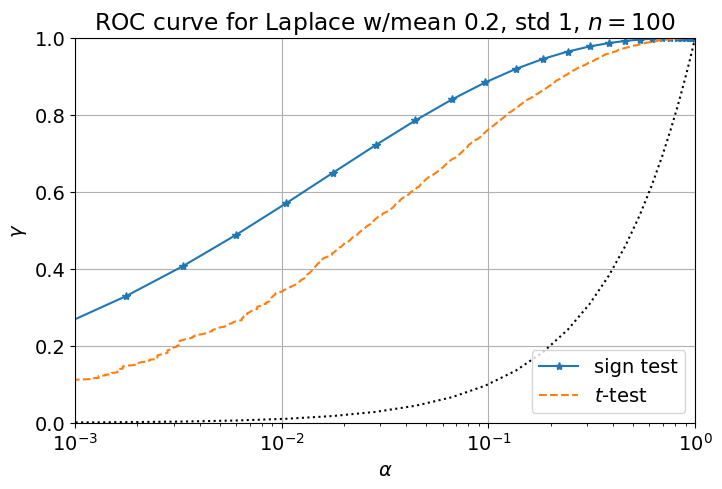

In [28]:
plt.semilogx(alphas_c,gammas_c,'-*',label='sign test'); plt.semilogx(alphas_c,alphas_c,'k:');
plt.semilogx(alphat_c,gammat_c,'--',label=r'$t$-test');plt.xlabel(r'$\alpha$');plt.ylabel(r'$\gamma$');
plt.title(r'ROC curve for Laplace w/mean %.1f, std 1, $n=%d$' % (theta,n));plt.grid(True);
plt.legend(loc='lower right');plt.xlim(1e-3,1);plt.ylim(0,1);

## Asymptotic Relative Efficiency

- Finally, consider a measure mentioned frequently in Conover, and defined in Section 2.4.

- Consider two tests w/same significance $\alpha=\alpha_1=\alpha_2$ & power $\gamma=\gamma_1=\gamma_2$ at fixed $\theta$.

- To get this, need to apply tests to samples of different sizes $n_1\ne n_2$. The **relative efficiency** of test 2 relative to test 1 is $\frac{n_1}{n_2}$. (The more efficient test can acheive the same significance and power with a smaller sample size.)

- In the limit that the sample size becomes large, this is known as the asymptotic relative efficiency (A.R.E.).

- Tricky to estimate relative efficiency numerically, since you don't know what sample size to use for each test.

- One trick: fix $\alpha$ & $\theta$, and calculate $\gamma$ for a bunch of sample sizes $n$.  Plot $n$ vs $\gamma$ for each test & compare $n_1$ & $n_2$ at $\gamma_1=\gamma_2$.

- For large $n$, $\gamma\approx 1$, so actually best to calculate $\beta=1-\gamma=P(\color{royalblue}{T}\mathbin{\le}c|H_1)$ & plot $\beta$ on a logarithmic scale.

- Also use a log scale for $n$, so we can eyeball the ratio of different $n$ at the same $\gamma$, which corresponds to the separation on a log scale.

Plot this for the sign test.
- $c_s$ is the $1-\alpha$ quantile of the $\operatorname{Bin}(n,0.5)$ distribution (i.e., a different threshold for every $n$)

In [29]:
n_n = np.array(np.logspace(2,5,100),dtype=int); n_n

array([   100,    107,    114,    123,    132,    141,    151,    162,
          174,    187,    200,    215,    231,    247,    265,    284,
          305,    327,    351,    376,    403,    432,    464,    497,
          533,    572,    613,    657,    705,    756,    811,    869,
          932,   1000,   1072,   1149,   1232,   1321,   1417,   1519,
         1629,   1747,   1873,   2009,   2154,   2310,   2477,   2656,
         2848,   3053,   3274,   3511,   3764,   4037,   4328,   4641,
         4977,   5336,   5722,   6135,   6579,   7054,   7564,   8111,
         8697,   9326,  10000,  10722,  11497,  12328,  13219,  14174,
        15199,  16297,  17475,  18738,  20092,  21544,  23101,  24770,
        26560,  28480,  30538,  32745,  35111,  37649,  40370,  43287,
        46415,  49770,  53366,  57223,  61359,  65793,  70548,  75646,
        81113,  86974,  93260, 100000])

In [30]:
alpha = 0.05; p0 = 0.5; cs_n = stats.binom(n_n,p0).isf(alpha); cs_n

array([   58.,    62.,    66.,    71.,    75.,    80.,    86.,    91.,
          98.,   105.,   112.,   120.,   128.,   136.,   146.,   156.,
         167.,   178.,   191.,   204.,   218.,   233.,   250.,   267.,
         285.,   306.,   327.,   350.,   374.,   401.,   429.,   459.,
         491.,   526.,   563.,   602.,   645.,   690.,   739.,   792.,
         848.,   908.,   972.,  1041.,  1115.,  1195.,  1279.,  1370.,
        1468.,  1572.,  1684.,  1804.,  1932.,  2071.,  2218.,  2377.,
        2547.,  2728.,  2923.,  3132.,  3356.,  3596.,  3854.,  4130.,
        4425.,  4742.,  5082.,  5446.,  5837.,  6255.,  6704.,  7185.,
        7701.,  8253.,  8846.,  9482., 10163., 10893., 11675., 12514.,
       13414., 14379., 15413., 16521., 17710., 18984., 20350., 21815.,
       23385., 25068., 26873., 28808., 30883., 33107., 35492., 38049.,
       40791., 43730., 46881., 50260.])

- False dismissal prob $\beta=1-\gamma$ is $P(\color{royalblue}{N_+}\mathbin{\le}c_s)$ for $\color{royalblue}{N_+}\sim\operatorname{Bin}(n,p_{\theta})$, where $p_{\theta}$ is the
fraction of the sampling distribution to the right of the origin when
the location parameter is $\theta$. We do this for a $N(\theta,1)$
sampling distribution:

In [31]:
theta = 0.2; p1 = stats.norm(loc=theta).sf(0); p1

0.579259709439103

In [32]:
betas_n = stats.binom(n_n,p1).cdf(cs_n); betas_n

array([5.44140922e-001, 5.38417990e-001, 5.33090986e-001, 5.16347210e-001,
       4.30897912e-001, 4.18876846e-001, 4.34955828e-001, 3.53503484e-001,
       3.61200803e-001, 3.36865659e-001, 3.14594179e-001, 2.87537653e-001,
       2.39101110e-001, 1.98053236e-001, 1.91539195e-001, 1.67778217e-001,
       1.43724825e-001, 1.10910211e-001, 1.00907756e-001, 8.26781454e-002,
       6.62006510e-002, 5.17894930e-002, 4.32220280e-002, 3.23141339e-002,
       2.10118241e-002, 1.79970242e-002, 1.22428357e-002, 8.93243500e-003,
       5.01313939e-003, 3.75883769e-003, 2.16033634e-003, 1.33779306e-003,
       6.96908496e-004, 3.82697212e-004, 2.00332129e-004, 8.77618380e-005,
       4.52358807e-005, 1.70820848e-005, 6.66696256e-006, 3.08618055e-006,
       1.01582258e-006, 3.02735383e-007, 8.16573222e-008, 1.94394304e-008,
       4.69787301e-009, 1.12664950e-009, 1.60207628e-010, 2.53756104e-011,
       3.89788063e-012, 4.46672315e-013, 4.18906066e-014, 3.21377222e-015,
       2.01608824e-016, 1

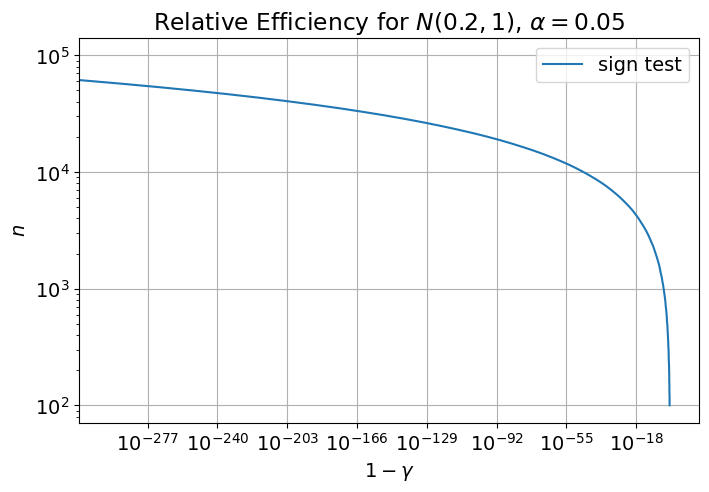

In [33]:
plt.loglog(betas_n,n_n,'-',label='sign test');
plt.title(r'Relative Efficiency for $N(%.1f,1)$, $\alpha=%g$' % (theta,alpha));
plt.xlabel(r'$1-\gamma$');plt.ylabel(r'$n$');plt.grid(True);plt.legend();

Now for the $t$-test, we really don’t want to do a Monte Carlo which
we’d have to re-do for each sample size $n$ we’re trying out. Instead,
we rely on the central limit theorem, which tells us that, for large
$n$, the $t$-statistic is approximately a $N(\theta\sqrt{n},1)$ random
variable, and
$$P({\color{royalblue}{T}}\le c) \approx \Phi\left(c-\theta\sqrt{n}\right)$$

In [34]:
ct = stats.norm.isf(alpha); ct

1.6448536269514729

In [35]:
betat_n = stats.norm(loc=theta*np.sqrt(n_n)).cdf(ct); betat_n

array([3.61239969e-001, 3.35796596e-001, 3.11868126e-001, 2.83236473e-001,
       2.56887348e-001, 2.32690572e-001, 2.08169946e-001, 1.83865738e-001,
       1.60275174e-001, 1.37833394e-001, 1.18290968e-001, 9.89213706e-002,
       8.15255314e-002, 6.70155737e-002, 5.35996164e-002, 4.22091342e-002,
       3.23014454e-002, 2.43176695e-002, 1.77702805e-002, 1.27649047e-002,
       8.89119598e-003, 6.00129263e-003, 3.86917018e-003, 2.44763570e-003,
       1.47690235e-003, 8.49217602e-004, 4.71649683e-004, 2.49261634e-004,
       1.23421350e-004, 5.80455007e-005, 2.55259142e-005, 1.06453016e-005,
       4.08116308e-006, 1.43646306e-006, 4.70890946e-007, 1.41427337e-007,
       3.82662970e-008, 9.31529148e-009, 2.00526501e-009, 3.87374480e-010,
       6.49362774e-011, 9.43093899e-012, 1.18496251e-012, 1.24429462e-013,
       1.10836806e-014, 8.08677431e-016, 4.82396655e-017, 2.30915701e-018,
       8.70382705e-020, 2.57840332e-021, 5.68967918e-023, 9.33062657e-025,
       1.13474958e-026, 9

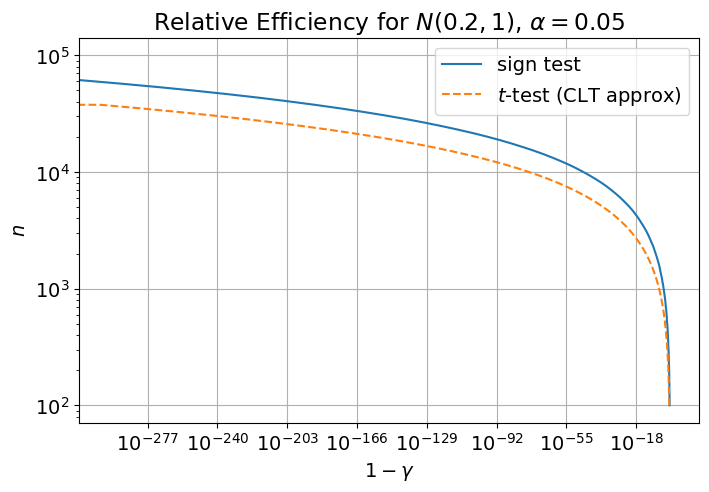

In [36]:
plt.loglog(betas_n,n_n,'-',label='sign test');
plt.loglog(betat_n,n_n,'--',label=r'$t$-test (CLT approx)');
plt.title(r'Relative Efficiency for $N(%.1f,1)$, $\alpha=%g$' % (theta,alpha));
plt.xlabel(r'$1-\gamma$');plt.ylabel(r'$n$');plt.grid(True);plt.legend();

For large $n$, separation is constant, ratio $\approx 6\times 10^4/4\times 10^4\approx 1.5$

We can see that, as the curves go to large $n$ (in the upper left-hand
part of the figure), they seem to have a constant difference between
them, and by eyeballing the fact that the sign test curve hits the left
edge at around $6\times 10^4$ and the $t$-test curve would be
extrapolated to around $4\times 10^4$, it looks like we might expect the
A.R.E. of the $t$-test relative to the sign test to be $1.5$ or so.

We
also notice that neither of the curves actually makes it up to $10^5$
because the $\beta$ calculation is underflowing, and the binomial cdf in
the sign test does so sooner than the normal cdf in the $t$ test. This
suggests that we should use some sort of asymptotic approximation, and
in fact this is used in the actual computation of the limiting case.

The calculation of A.R.E. is complicated in general, but it’s made
somewhat simpler if we recall that for large sample sizes most test
statistics are approximately normally distributed.

$${\color{royalblue}{Z_s}} = \frac{{\color{royalblue}{N_{+}}}-n/2}{\sqrt{n}/2} \hbox{ (sign test)}
\qquad
{\color{royalblue}{Z_t}} = \frac{{\color{royalblue}{{{\overline{X}}}}}}{\sqrt{{\color{royalblue}{S^2}}/n}}
\hbox{ ($t$-test)}$$

under $H_0$, both are standard normal, and so we reject if the statistic
exceeds $z_{1-\alpha}$.

If the location parameter is $\theta$ under
$H_1$, then $E({\color{royalblue}{N_{+}}})=np_{\theta}$ and
$V({\color{royalblue}{N_{+}}})=np_{\theta}(1-p_{\theta})$, so

$$\begin{gathered}
    E({\color{royalblue}{Z_s}}) = \frac{np_{\theta}-n/2}{\sqrt{n}/2}
    = \sqrt{n}(2p_{\theta}-1)
    \\
    \operatorname{Var}({\color{royalblue}{Z_s}}) = \frac{4}{n}np_{\theta}(1-p_{\theta})
    = 4p_{\theta}(1-p_{\theta})
  \end{gathered}$$

and $$\gamma_s \approx P({\color{royalblue}{Z_s}} > z_{1-\alpha})
  = 1 - \Phi\left(
    \frac{z_{1-\alpha}-\sqrt{n_s}(2p_{\theta}-1)}
    {\sqrt{4p_{\theta}(1-p_{\theta})}}
  \right)$$ where
$$\Phi(z) = \frac{1}{2\pi}\int_{-\infty}^z e^{-t^2/2}\,dt$$ is the
standard normal cdf.

Similarly, if the sampling distribution is
$N(\theta,1)$, then $E({\color{royalblue}{{{\overline{X}}}}})=\theta$ and
$V({\color{royalblue}{{{\overline{X}}}}})=1/n$, and
$$E({\color{royalblue}{Z_t}}) = \theta\sqrt{n}
  \qquad\hbox{and}\qquad
  \operatorname{Var}({\color{royalblue}{Z_t}}) = 1$$ so
$$\gamma_t \approx P({\color{royalblue}{Z_t}} > z_{1-\alpha})
  = 1 - \Phi\left(z_{1-\alpha}-\theta\sqrt{n_t}\right)$$

$$\gamma_s \approx 1 - \Phi\left(
    \frac{z_{1-\alpha}-\sqrt{n_s}(2p_{\theta}-1)}
    {\sqrt{4p_{\theta}(1-p_{\theta})}}
  \right)\qquad\hbox{and}\qquad\gamma_t \approx 1 - \Phi\left(z_{1-\alpha}-\theta\sqrt{n_t}\right)$$

Now, in order
to ensure that $\gamma_s=\gamma_t$, we must have
$$\frac{\sqrt{n_s}(2p_{\theta}-1)-z_{1-\alpha}}
  {\sqrt{4p_{\theta}(1-p_{\theta})}}
  \approx \theta\sqrt{n_t}-z_{1-\alpha}$$

It seems like in general
$n_s/n_t$ will depend on both $\theta$ and $\alpha$, and the $\theta$
dependence doesn’t look like it will go away even when
$n\rightarrow\infty$.

But, since we’re supposed to carry out the
comparison at fixed $\alpha$ and $\gamma$, as we send the sample size to
infinity, we have to send the effect size $\theta$ to zero, which means
$p_{\theta}\rightarrow \frac{1}{2}$.

Thus we can (to leading order) set
the denominator on the left-hand size to one, which leaves us with
$$\sqrt{n_s}(2p_{\theta}-1)-z_{1-\alpha}
  \approx \theta\sqrt{n_t}-z_{1-\alpha}$$ and
$$\frac{n_s}{n_t} = \lim_{\theta\rightarrow 0}
  \left(\frac{\theta}{2p_{\theta}-1}\right)^2$$

We can use l’Hôpital’s
rule to deal with the limit, or just expand the form of $p_\theta$ to
first order for small $\theta$. If the sampling distribution is normal,
$$p_{\theta}
    =\frac{1}{\sqrt{2\pi}}\int_{0}^{\infty} e^{-(x-\theta)^2/2}\,dx
    =\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\theta} e^{-z^2/2}\,dz
\approx \frac{1}{2} + \frac{\theta}{\sqrt{2\pi}} e^{-0^2/2}$$ so
$$\lim_{\theta\rightarrow 0} \frac{\theta}{2p_{\theta}-1}
  = \lim_{\theta\rightarrow 0} \frac{\theta}{2\theta/\sqrt{2\pi}}
  = \sqrt{\frac{\pi}{2}}$$ and
$\hbox{A.R.E.} = \frac{\pi}{2} \approx 1.57$ which is about the value
we eyeballed from the plot.